The following equations obtained using Newton's laws of motion are solved in the code using verlet method:

$$\frac{d^2x}{dt^2}=-\frac{a}{m}\sqrt{{v_x}^2+{v_y}^2}-\frac{wb}{m}v_y$$

$$\frac{d^2y}{dt^2}=--g-\frac{a}{m}\sqrt{{v_x}^2+{v_y}^2}-\frac{wb}{m}v_x$$

$$v_x=\frac{dx}{dt}$$
$$v_y=\frac{dy}{dt}$$

The constant a, b, w and m are 0.05, 0.02, 0.1 and 0.25, respectively.

In [1]:
from numpy import sin, cos, array, linspace, zeros, ones
import matplotlib.pyplot as plt

In [2]:
# constants
a=0.05
b=0.02
m=0.25
g=9.81
w=0.1

In [3]:
# initial conditions and all that
dt = 0.01       # time step size
tf = 10         # final time
nt=int(tf/dt)   # number of time steps to be calculated
v_ini=30        # initial absolute velocity
angle=1.0472    # 60 degrees in radians
vx=[v_ini*cos(angle)] 
vy=[v_ini*sin(angle)]
ax=zeros(nt+1) # this will initialize the initial x-acceleration as zero
ay=zeros(nt+1) # this will initialize the initial y-acceleration as zero
x=zeros(nt+1) # this will initialize the initial x-coordinate as zero
y=zeros(nt+1) # this will initialize the initial y-coordinate as zero

In [4]:
#verlet loop
for i in range(0,nt):
    ax[i+1]=-(a/m)*((vx[i]**2+vy[i]**2)**0.5)*vx[i]-(w*b/m)*vy[i]
    ay[i+1]=-g-(a/m)*((vx[i]**2+vy[i]**2)**0.5)*vy[i]+(w*b/m)*vx[i]
    x[i+1]=x[i]+vx[i]*dt+0.5*ax[i+1]*dt*dt
    y[i+1]=y[i]+vy[i]*dt+0.5*ay[i+1]*dt*dt
    vx_tmp=vx[i]+(ax[i]+ax[i+1])*dt*0.5 #change velocity calculation needed to increase accuracy
    vy_tmp=vy[i]+(ay[i]+ay[i+1])*dt*0.5
    vx.append(vx_tmp)
    vy.append(vy_tmp)

<function matplotlib.pyplot.show(*args, **kw)>

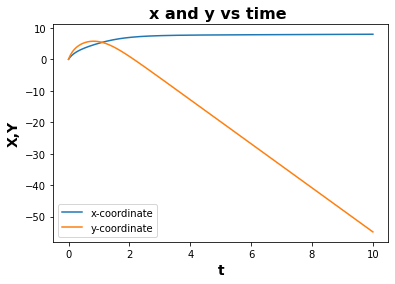

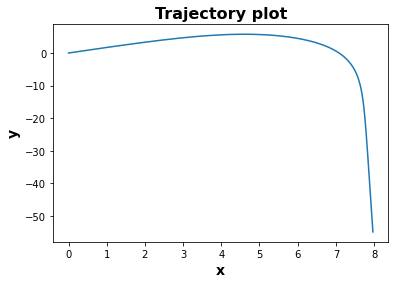

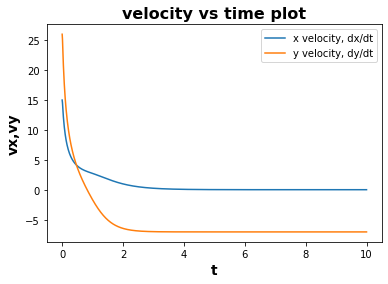

In [5]:
t=linspace(0,len(x)+1)
x=array(x)
t = [ i for i in linspace(0,tf,nt+1) ]
t2 = [ i for i in linspace(0,tf,nt+1) ]
plt.plot(t,x,label='x-coordinate')
plt.plot(t,y, label='y-coordinate')
plt.title('x and y vs time ', fontweight = 'bold', fontsize = 16)
plt.xlabel('t', fontweight = 'bold', fontsize = 14)
plt.ylabel('X,Y', fontweight = 'bold', fontsize = 14)
plt.legend()
plt.show
plt.figure(2)
plt.plot(x,y)
plt.title('Trajectory plot', fontweight = 'bold', fontsize = 16)
plt.xlabel('x', fontweight = 'bold', fontsize = 14)
plt.ylabel('y', fontweight = 'bold', fontsize = 14)
plt.show
plt.figure(3)
plt.plot(t2,vx,label='x velocity, dx/dt')
plt.plot(t2,vy,label='y velocity, dy/dt')
plt.title('velocity vs time plot', fontweight = 'bold', fontsize = 16)
plt.xlabel('t', fontweight = 'bold', fontsize = 14)
plt.ylabel('vx,vy', fontweight = 'bold', fontsize = 14)
plt.legend()
plt.show